<a href="https://colab.research.google.com/github/Harsh374/Elevate-Labs-Task-2/blob/main/Elevate_Labs_Task_2_April_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2: Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = "/content/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Display basic info: first few rows, data types, and missing values
df_info = {
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


{'head':    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450 

**The dataset here is Titanic dataset.**
Here's the summary of what we found:

Total Rows: 891

Columns with Missing Values:

Age: 177 missing

Cabin: 687 missing (significant)

Embarked: 2 missing

In [ ]:
#1. Handle Missing Values

import numpy as np

# Impute Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Create a new binary column indicating presence of Cabin info
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# Drop Cabin column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Check for any remaining missing values
missing_after_imputation = df.isnull().sum()
missing_after_imputation


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


All missing values have been handled!

Here's what we did:
1. Filled Age with the median.
2. Filled Embarked with the mode.
3. Created a new column HasCabin as a binary indicator.
4. Dropped the original Cabin column due to excessive missing data.

**Step 2: Encode Categorical Variables**

We have two categorical columns to encode:
1. Sex (male/female)
2. Embarked (C, Q, S)

We’ll use:
1. Label Encoding for Sex (since it's binary: male/female → 0/1)
2. One-Hot Encoding for Embarked (multiple categories: C, Q, S)

In [ ]:
#Step 2: Encode Categorical Variables

# Encode 'Sex' using Label Encoding (binary)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Display the first few rows to confirm encoding
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  HasCabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500         0       False       False        True  
1          PC 17599  71.2833         1        True       False       False  
2  STON/O2. 3101282   7.9250         0       False       False   

Step 2 is complete — here's a quick summary of the results:

Encoded Features:
1. Sex: Mapped to 0 (male) and 1 (female)
2. Embarked: One-hot encoded into:
*   Embarked_C
*   Embarked_Q
*   Embarked_S








**Step 3: Normalize / Standardize Numerical Features**
We'll normalize or standardize features like:
Age, Fare, SibSp, Parch

Standardization (mean=0, std=1) is a common choice

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Preview the standardized data
print(df[num_cols].head())


        Age      Fare     SibSp     Parch
0 -0.565736 -0.502445  0.432793 -0.473674
1  0.663861  0.786845  0.432793 -0.473674
2 -0.258337 -0.488854 -0.474545 -0.473674
3  0.433312  0.420730  0.432793 -0.473674
4  0.433312 -0.486337 -0.474545 -0.473674


Step 3 is complete — numerical features are now standardized (mean ≈ 0, std ≈ 1), which is great for most ML models like SVM, KNN, or logistic regression.

**Step 4: Outlier Detection and Removal**
Now we’ll:

1. Visualize outliers using boxplots (for Age, Fare, etc.)

2. Optionally remove them using the IQR (interquartile range) method.

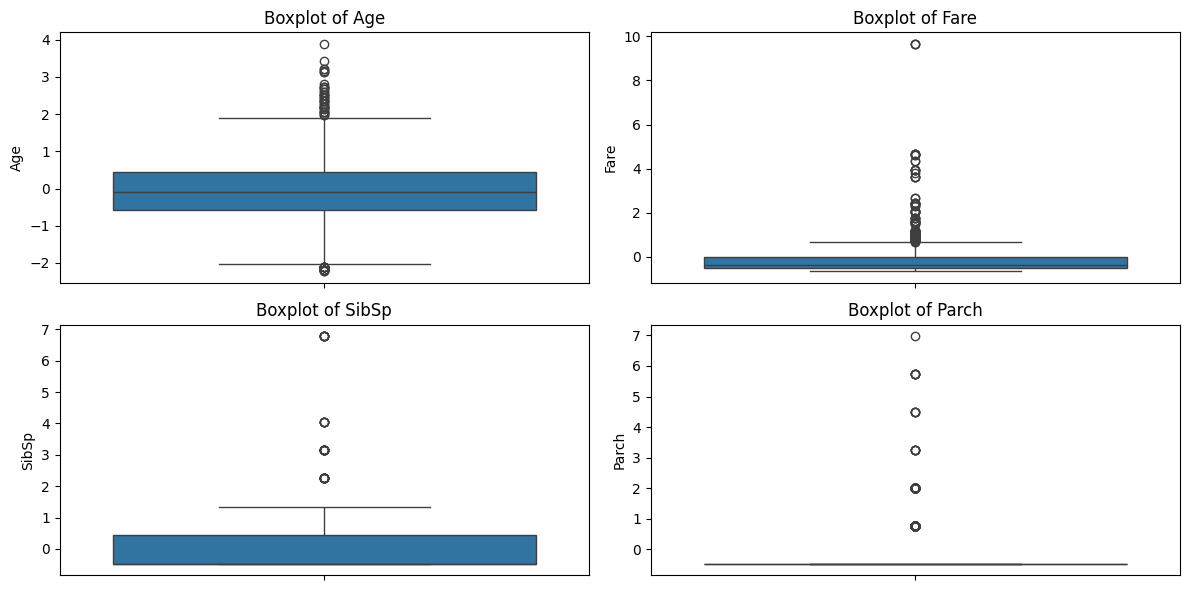

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up boxplots for numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Outlier Summary:

Feature | Outliers Present?     | Notes
Age     | Some mild outliers    | Not severe — usually OK to keep
Fare    |  Many strong outliers | Definitely worth trimming
SibSp   |  Obvious outliers > 2 | Can be trimmed
Parch   |  Extreme values > 3   | Can be trimmed

**Remove Outliers (IQR Method)**

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from multiple columns
for col in ['Fare', 'SibSp', 'Parch']:
    df = remove_outliers_iqr(df, col)

# Print shape to show how many rows remain
print("New dataset shape:", df.shape)


New dataset shape: (607, 14)


Generate summary statistics (mean, median, std, etc.)

In [ ]:
# Display summary statistics for the updated DataFrame
print(df.describe())


       PassengerId    Survived      Pclass         Sex         Age  \
count   607.000000  607.000000  607.000000  607.000000  607.000000   
mean    448.166392    0.294893    2.462932    0.242175    0.120974   
std     258.978802    0.456371    0.758794    0.428753    0.851474   
min       1.000000    0.000000    1.000000    0.000000   -1.872184   
25%     220.500000    0.000000    2.000000    0.000000   -0.335187   
50%     457.000000    0.000000    3.000000    0.000000   -0.104637   
75%     671.000000    1.000000    3.000000    0.000000    0.375674   
max     891.000000    1.000000    3.000000    1.000000    3.891554   

            SibSp         Parch        Fare    HasCabin  
count  607.000000  6.070000e+02  607.000000  607.000000  
mean    -0.302644 -4.736736e-01   -0.341843    0.148270  
std      0.395624  1.611151e-15    0.254034    0.355661  
min     -0.474545 -4.736736e-01   -0.648422    0.000000  
25%     -0.474545 -4.736736e-01   -0.491874    0.000000  
50%     -0.474545 -4.

Histograms and boxplots for numeric features.

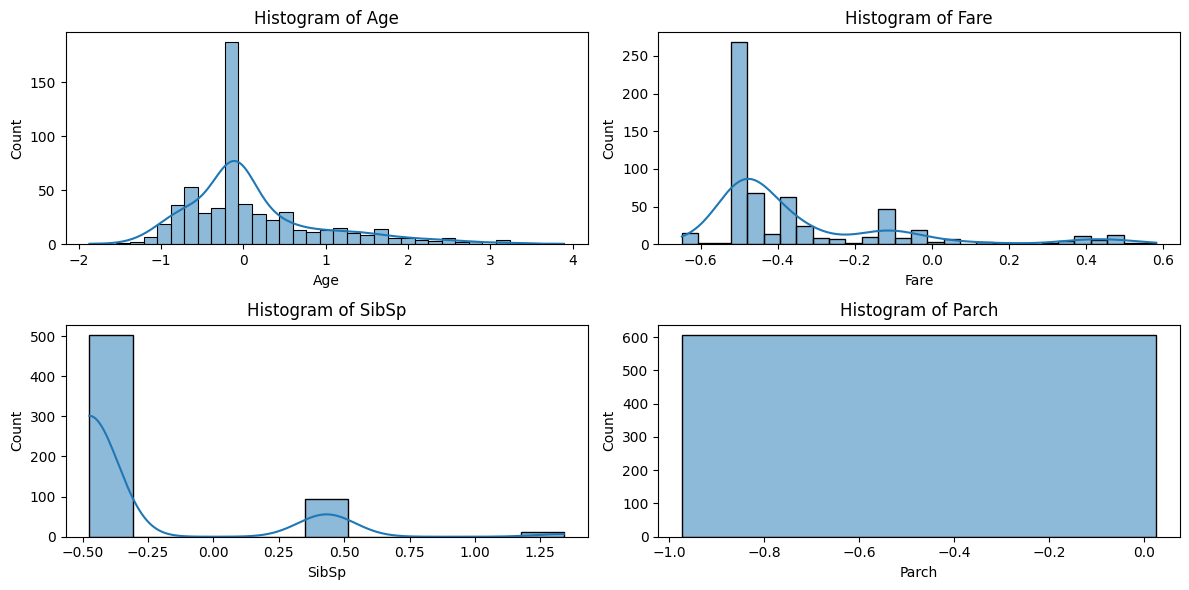

In [ ]:
# Create histograms
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True) # Added kde for density plot
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


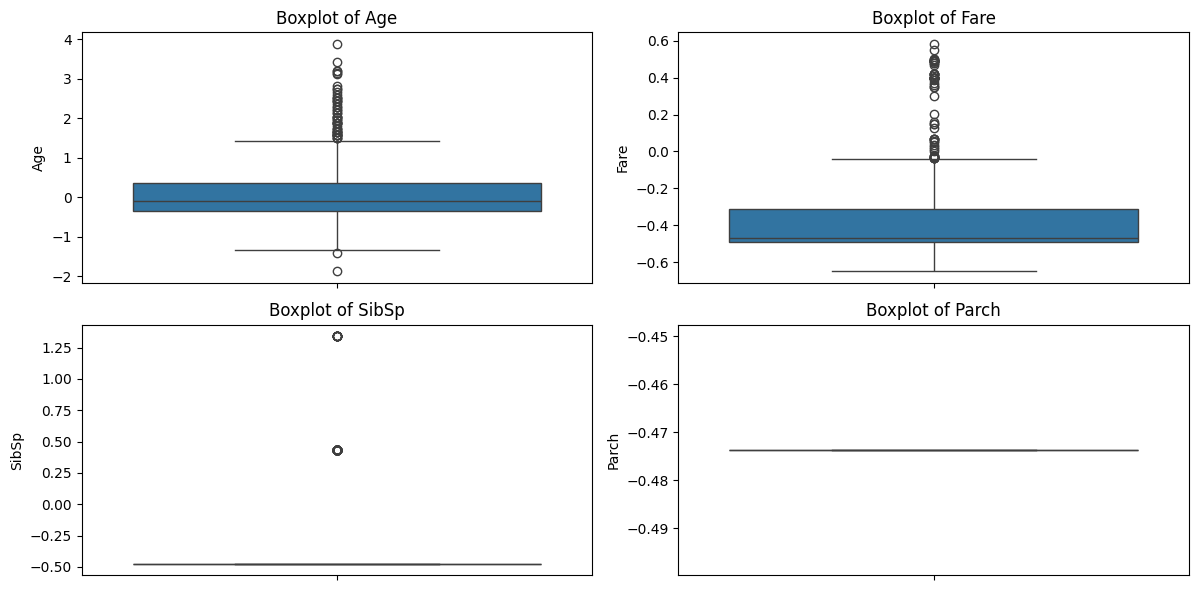

In [ ]:
# Create boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


pairplot/correlation matrix for feature relationships.

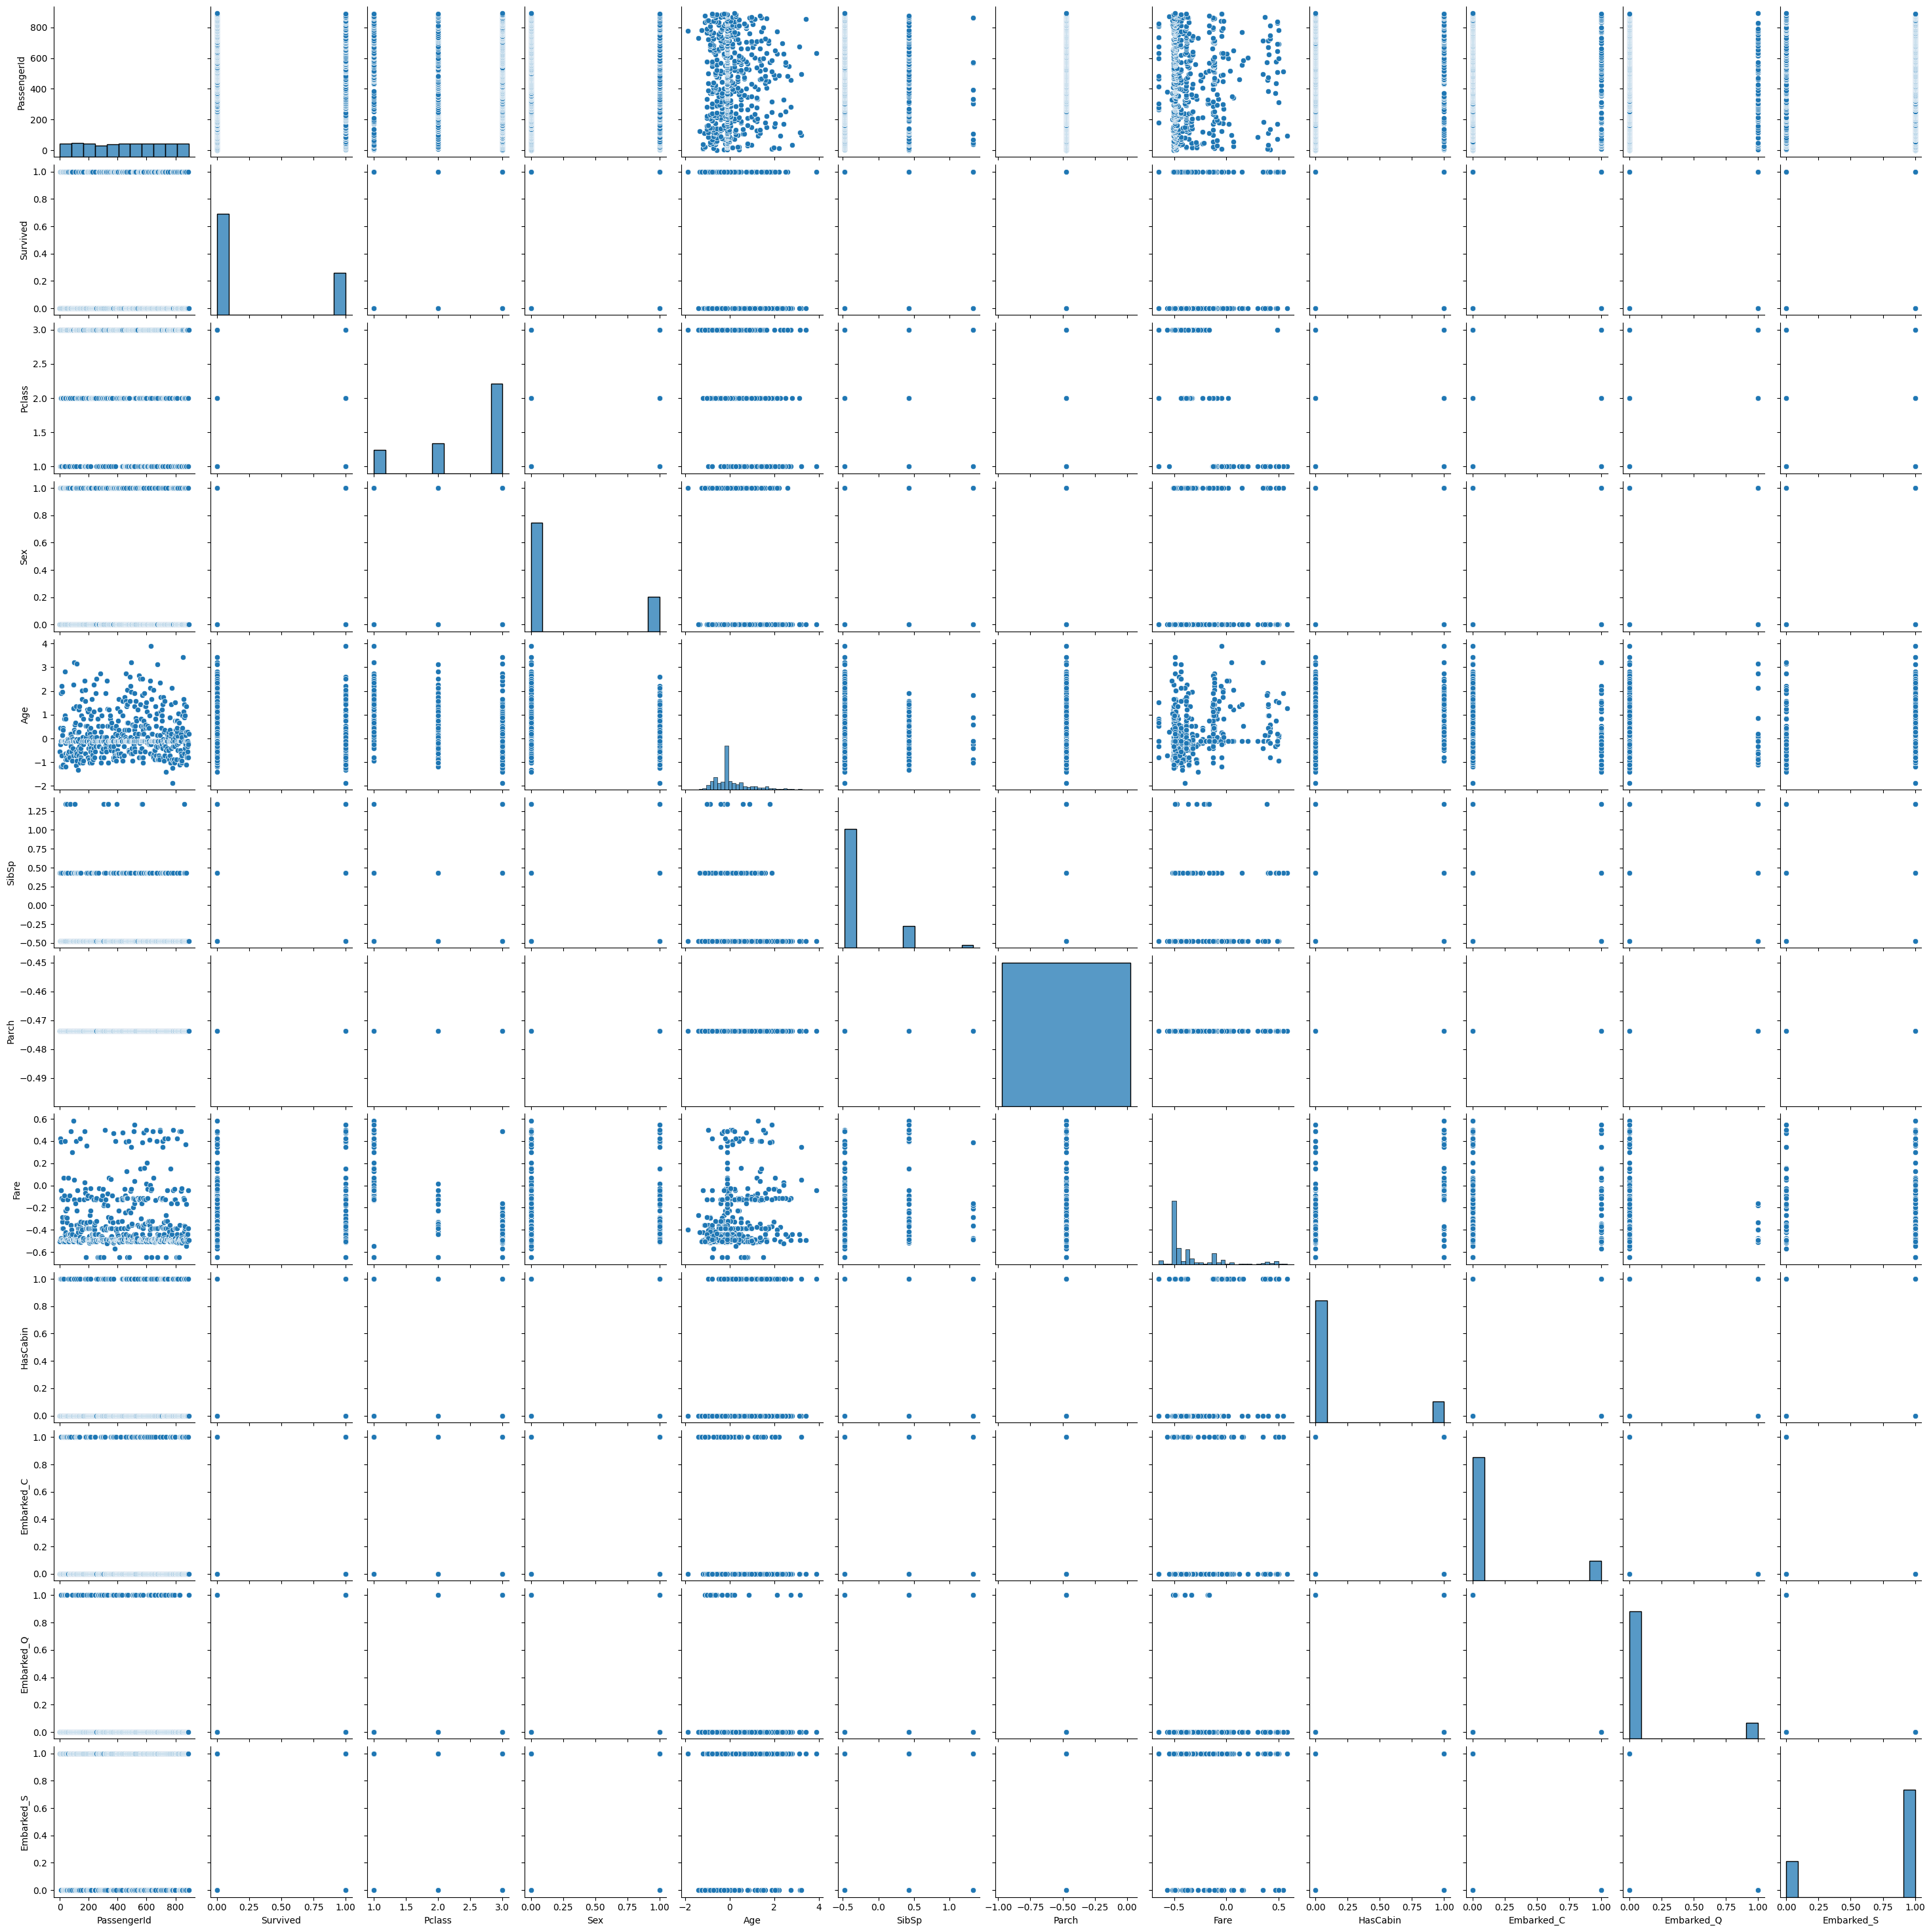

In [ ]:
# Use pairplot for visualizing pairwise relationships
sns.pairplot(df)
plt.show()


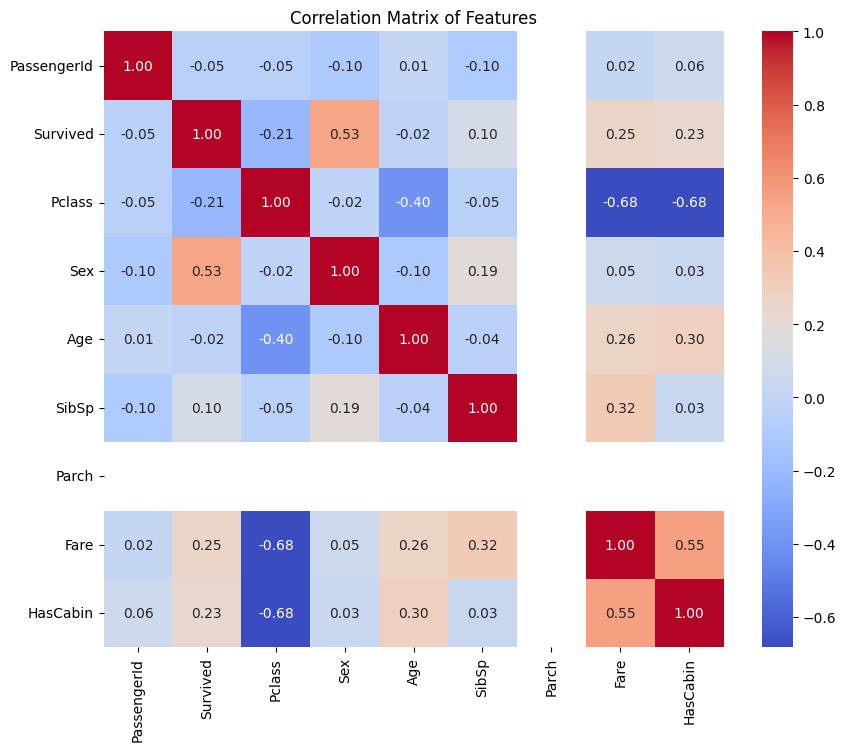

In [ ]:
# Calculate and display the correlation matrix
# Exclude non-numeric columns from the correlation calculation
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Identify patterns, trends, or anomalies in the data.

Correlation between Fare and Survived: 0.2522715430503553


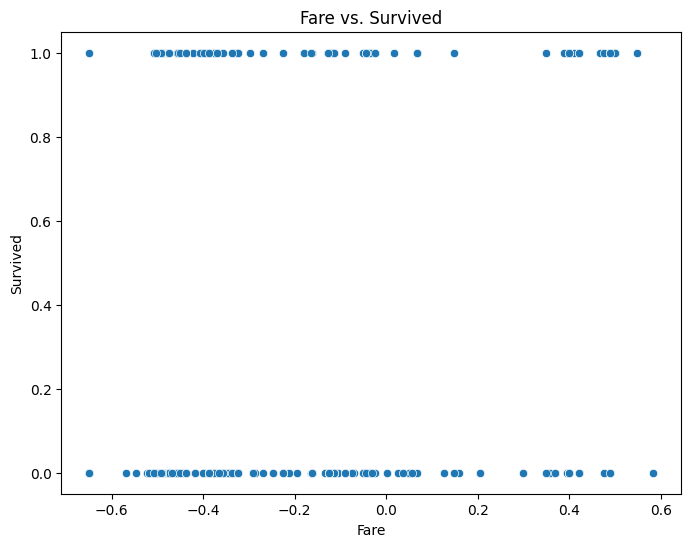

        Survived
Pclass          
1       0.474747
2       0.367188
3       0.223684


<ipython-input-14-288032b76a24>:26: FutureWarning: The provided callable <function mean at 0x7ae895b09ee0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.pivot_table(df, index='Pclass', values='Survived', aggfunc=np.mean))


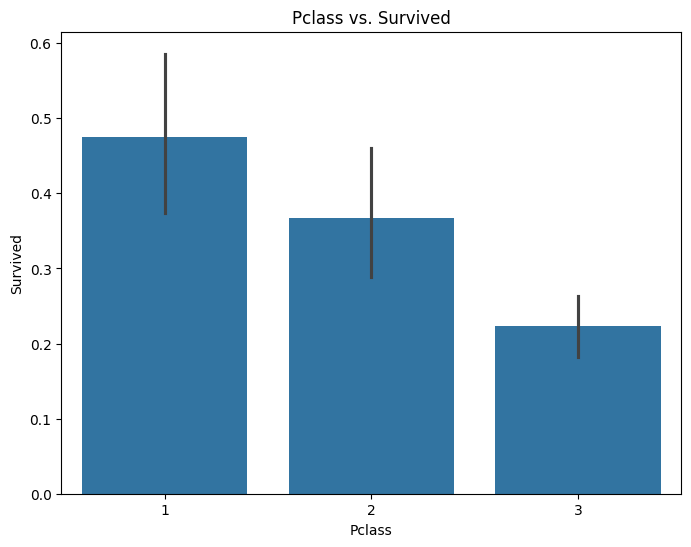

In [ ]:
# Identify patterns, trends, or anomalies in the data.
# Analyze the correlation matrix for relationships between features.
# Look for strong positive or negative correlations.
# Examine the pairplot for visual patterns and potential non-linear relationships.
# Investigate distributions in histograms and boxplots for skewness, outliers, and central tendencies.
# Consider the impact of outlier removal on distributions and correlations.

# Example: Investigate the correlation between 'Fare' and 'Survived' (if 'Survived' is in your dataset).
# A positive correlation might suggest higher fares were associated with better survival rates.

# Example code (assuming 'Survived' is a column):
if 'Survived' in df.columns:
    correlation_survived = df['Survived'].corr(df['Fare'])
    print(f"Correlation between Fare and Survived: {correlation_survived}")
    #Further analysis using scatter plots for visualization.
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Fare', y='Survived', data=df)
    plt.title('Fare vs. Survived')
    plt.show()

#Further analysis based on other features.
#Example: Analyze Pclass vs Survived
if 'Pclass' in df.columns and 'Survived' in df.columns:
  print(pd.pivot_table(df, index='Pclass', values='Survived', aggfunc=np.mean))
  plt.figure(figsize=(8, 6))
  sns.barplot(x='Pclass', y='Survived', data=df)
  plt.title('Pclass vs. Survived')
  plt.show()
